In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os
from scipy.fftpack import dct, idct

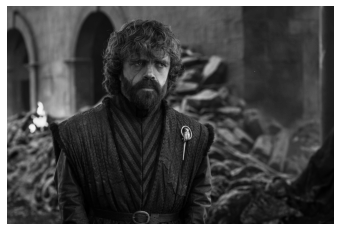

In [2]:
A = imread('images/tyrion.jpg') #imported the jpg
X = np.mean(A,-1) #convert it into gray-scale
plt.imshow(X).set_cmap('gray') #convert it into gray-scale
plt.axis('off') #x-y axis disabled
plt.show()

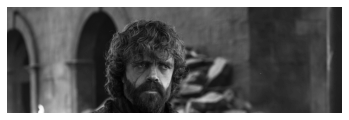

In [3]:
size = 1000
plt.imshow(X[0:size].reshape(size,-1)).set_cmap('gray')
plt.axis('off')
plt.show()

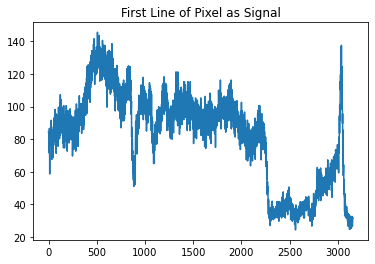

In [4]:
Y = X[0]
plt.plot(np.linspace(0,len(Y),len(Y)),Y)
plt.title("First Line of Pixel as Signal")
plt.show()

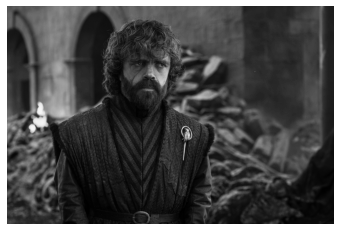

In [5]:
X = np.mean(A,-1) #convert it into gray-scale

# Image size of form => (8X, 8Y)
x = int(X.shape[0]/8) * 8 
y = int(X.shape[1]/8) * 8
X = X[:x,:y]
plt.imshow(X).set_cmap('gray')
plt.axis('off')
plt.show()

In [6]:
def jpeg_encoder(im):
    
    # Applying dct on rows and columns
    imF = dct(dct(im, norm="ortho").T, norm="ortho").T
    
    qtable = np.array([[16  ,11  ,10  ,16  ,24   ,40   ,51   ,61],
                        [12  ,12  ,14  ,19  ,26   ,58   ,60   ,55],   
                        [14  ,13  ,16  ,24  ,40   ,57   ,69   ,56],   
                        [14  ,17  ,22  ,29  ,51   ,87   ,80   ,62],   
                        [18  ,22  ,37  ,56  ,68   ,109  ,103  ,77],   
                        [24  ,35  ,55  ,64  ,81   ,104  ,113  ,92],   
                        [49  ,64  ,78  ,87  ,103  ,121  ,120  ,101],  
                        [72  ,92  ,95  ,98  ,112  ,100  ,103  ,99]])
    
    for i in range(0,imF.shape[0], 8):
        for j in range(0, imF.shape[1], 8):
            imF[i:i+8,j:j+8] = np.rint(imF[i:i+8,j:j+8]/qtable)*qtable
    
    return imF
    
def jpeg_decoder(imF):
    
    # Applying idct on rows and columns
    return idct(idct(imF.T, norm="ortho").T, norm="ortho")

Peak Signal to Noise Ratio is 31.154042575075678


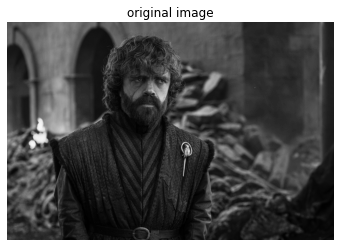

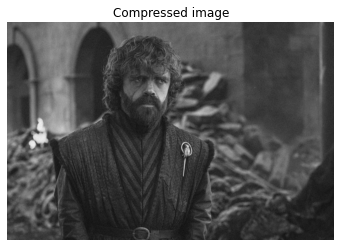

In [7]:
X1 = jpeg_decoder(jpeg_encoder(X))

Imax = np.max(X)
MSE = np.sum((X-X1)**2)/(X.shape[0]*X.shape[1])

PSNR = 10*np.log10(Imax**2/MSE)

print(f"Peak Signal to Noise Ratio is {PSNR}")

plt.imshow(X).set_cmap('gray'), plt.axis('off'), plt.title('original image')
plt.show()
plt.imshow(X1).set_cmap('gray'), plt.axis('off'), plt.title('Compressed image')
plt.show()